In [9]:
import nltk
import pandas as pd
from nltk.corpus import stopwords  # Importing Natural Language Toolkit
from nltk.stem import WordNetLemmatizer

In [10]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\hCOVID_INDIA.CSV',header=None,names=["created_at","text","screen_name","location"])
#np.random.seed(0)

In [11]:
df.head(20)

,created_at,text,screen_name,location
0,29-01-2022 18:29,b'@drmikesevilla \nFor #ValentinesDay during #...,b'RobertBarrows3',"b'Khariar, Odisha, India'"
1,29-01-2022 17:33,"b""The myth of living in a 'normal' #Coronaviru...",b'TheHansIndiaWeb',"b'Jaipur, India'"
2,29-01-2022 16:36,b'Millions of people have lost their Jobs due\...,b'cryptofoolz_io',"b'New Delhi, India'"
3,29-01-2022 16:35,"b'#Mumbai reports 1,411 new #COVID19 cases, 3,...",b'thefirstindia',b'India'
4,29-01-2022 16:14,b'https://t.co/KURWeFljd4\nhow much more of th...,b'simon_ball46',b'India'
5,29-01-2022 15:10,"b'@SenatorWicker @POTUS Migrants,refugees &amp...",b'WorldPeace4you',"b'Jaipur, India'"
6,29-01-2022 14:48,b'via @NYTimes: Also points out irrationally o...,b'drindc86',b'India'
7,29-01-2022 14:29,b'SCOTLAND. \n\nCoronavirus (COVID-19): daily...,b'WorldCOVID19',"b'Bengaluru, India'"
8,29-01-2022 13:45,b'@RohitTuli84 @techindo21 @RohitTuli84 Thanks...,b'MSiddhivinayaka',"b'Kolkata, India'"
9,29-01-2022 13:40,b'#fact : Antibiotics do not work against viru...,b'SwerianBot',"b'Jaipur, India'"


In [12]:
df.shape

(721, 4)

In [13]:

    df['text'] = df['text'].astype(str).str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
df ['text']= df['text'].str.replace('RT ', '', case=False)  # Removing the phrase 'RT" from all strings
df['text'] = df['text'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
#df['text'] = df['text'].str.replace('[b]',' ')
#df['screen_name'] = df['screen_name'].str.replace('[b]',' ')
df['screen_name'] = df['screen_name'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
#df['text'] = df['text'].str.replace('[' 'b]','')
#df['text'] = df['text'].str.replace('[x[a-z]]','')
df ['text']= df['text'].str.replace('\r\n', ' ')  # Removing '\r\n' which is present in some strings
df['text'] = df['text'].str.replace('\d+', '').str.lower().str.strip()  # Removing numbers, capitalisation and white space


C:\Users\DELL\AppData\Local\Temp/ipykernel_2924/3775711699.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].astype(str).str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
C:\Users\DELL\AppData\Local\Temp/ipykernel_2924/3775711699.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
C:\Users\DELL\AppData\Local\Temp/ipykernel_2924/3775711699.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['screen_name'] = df['screen_name'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
C:\Users\DELL\AppData\Local\Temp/ipykernel_2924/3775711699.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '').str.lower().str.str

In [14]:
df.head(20)

,created_at,text,screen_name,location
0,29-01-2022 18:29,b drmikesevilla nfor valentinesday during ...,b RobertBarrows3,"b'Khariar, Odisha, India'"
1,29-01-2022 17:33,b the myth of living in a normal coronaviru...,b TheHansIndiaWeb,"b'Jaipur, India'"
2,29-01-2022 16:36,b millions of people have lost their jobs due ...,b cryptofoolz_io,"b'New Delhi, India'"
3,29-01-2022 16:35,b mumbai reports new covid cases recove...,b thefirstindia,b'India'
4,29-01-2022 16:14,b much more of this are we expected to take e...,b simon_ball46,b'India'
5,29-01-2022 15:10,b senatorwicker potus migrants refugees amp...,b WorldPeace4you,"b'Jaipur, India'"
6,29-01-2022 14:48,b via nytimes also points out irrationally o...,b drindc86,b'India'
7,29-01-2022 14:29,b scotland n ncoronavirus covid daily d...,b WorldCOVID19,"b'Bengaluru, India'"
8,29-01-2022 13:45,b rohittuli techindo rohittuli thanks for b...,b MSiddhivinayaka,"b'Kolkata, India'"
9,29-01-2022 13:40,b fact antibiotics do not work against viru...,b SwerianBot,"b'Jaipur, India'"


In [15]:
df['text'] = df['text'].str[1:]
df['screen_name'] = df['screen_name'].str[1:]
df['location'] = df['location'].str.replace('[^\w\s]', ' ')  # Removing any punctuation


C:\Users\DELL\AppData\Local\Temp/ipykernel_2924/1941090394.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['location'] = df['location'].str.replace('[^\w\s]', ' ')  # Removing any punctuation


In [16]:
df.head(20)

,created_at,text,screen_name,location
0,29-01-2022 18:29,drmikesevilla nfor valentinesday during c...,RobertBarrows3,b Khariar Odisha India
1,29-01-2022 17:33,the myth of living in a normal coronavirus...,TheHansIndiaWeb,b Jaipur India
2,29-01-2022 16:36,millions of people have lost their jobs due n...,cryptofoolz_io,b New Delhi India
3,29-01-2022 16:35,mumbai reports new covid cases recover...,thefirstindia,b India
4,29-01-2022 16:14,much more of this are we expected to take eh...,simon_ball46,b India
5,29-01-2022 15:10,senatorwicker potus migrants refugees amp ...,WorldPeace4you,b Jaipur India
6,29-01-2022 14:48,via nytimes also points out irrationally of...,drindc86,b India
7,29-01-2022 14:29,scotland n ncoronavirus covid daily da...,WorldCOVID19,b Bengaluru India
8,29-01-2022 13:45,rohittuli techindo rohittuli thanks for be...,MSiddhivinayaka,b Kolkata India
9,29-01-2022 13:40,fact antibiotics do not work against virus...,SwerianBot,b Jaipur India


In [17]:
df['location'] = df['location'].str[1:]

In [18]:
df.head(20)

,created_at,text,screen_name,location
0,29-01-2022 18:29,drmikesevilla nfor valentinesday during c...,RobertBarrows3,Khariar Odisha India
1,29-01-2022 17:33,the myth of living in a normal coronavirus...,TheHansIndiaWeb,Jaipur India
2,29-01-2022 16:36,millions of people have lost their jobs due n...,cryptofoolz_io,New Delhi India
3,29-01-2022 16:35,mumbai reports new covid cases recover...,thefirstindia,India
4,29-01-2022 16:14,much more of this are we expected to take eh...,simon_ball46,India
5,29-01-2022 15:10,senatorwicker potus migrants refugees amp ...,WorldPeace4you,Jaipur India
6,29-01-2022 14:48,via nytimes also points out irrationally of...,drindc86,India
7,29-01-2022 14:29,scotland n ncoronavirus covid daily da...,WorldCOVID19,Bengaluru India
8,29-01-2022 13:45,rohittuli techindo rohittuli thanks for be...,MSiddhivinayaka,Kolkata India
9,29-01-2022 13:40,fact antibiotics do not work against virus...,SwerianBot,Jaipur India


In [19]:
 nltk.download('stopwords')  # Downloading stop words
#stop = set(stopwords.words('english'))  # Selecting English stop words
#df['text'] = df['text'] .apply(lambda x: [item for item in x if item not in stop])  # Removing stop words from each string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
df.shape[0]

721

In [21]:
df['text'][10]

'  chrismasonbbc  bbcradio  tweeter_anita  bbcsounds being angry about  partygate now is a little late  the  proper  xe x xa'

In [23]:
lemmatizer = WordNetLemmatizer()
for i in range(df.shape[0]):
    words=nltk.word_tokenize(df['text'][i])
    words = [lemmatizer.lemmatize(w, pos='a') for w in words if w not in set(stopwords.words("english")) ]
    df['text'][i]=' '.join(words)

In [24]:
df['text'][10]

'chrismasonbbc bbcradio tweeter_anita bbcsounds angry partygate little late proper xe x xa'

In [25]:
df.head(20)

,created_at,text,screen_name,location
0,29-01-2022 18:29,drmikesevilla nfor valentinesday covid n roses...,RobertBarrows3,Khariar Odisha India
1,29-01-2022 17:33,myth living normal coronavirus lifestyle,TheHansIndiaWeb,Jaipur India
2,29-01-2022 16:36,millions people lost jobs due nto coronavirus ...,cryptofoolz_io,New Delhi India
3,29-01-2022 16:35,mumbai reports new covid cases recoveries deat...,thefirstindia,India
4,29-01-2022 16:14,much expected take eh uklabour n covid coronav...,simon_ball46,India
5,29-01-2022 15:10,senatorwicker potus migrants refugees amp kids...,WorldPeace4you,Jaipur India
6,29-01-2022 14:48,via nytimes also points irrationally side cons...,drindc86,India
7,29-01-2022 14:29,scotland n ncoronavirus covid daily data scotl...,WorldCOVID19,Bengaluru India
8,29-01-2022 13:45,rohittuli techindo rohittuli thanks poor middl...,MSiddhivinayaka,Kolkata India
9,29-01-2022 13:40,fact antibiotics work viruses bacteria coronav...,SwerianBot,Jaipur India


In [26]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

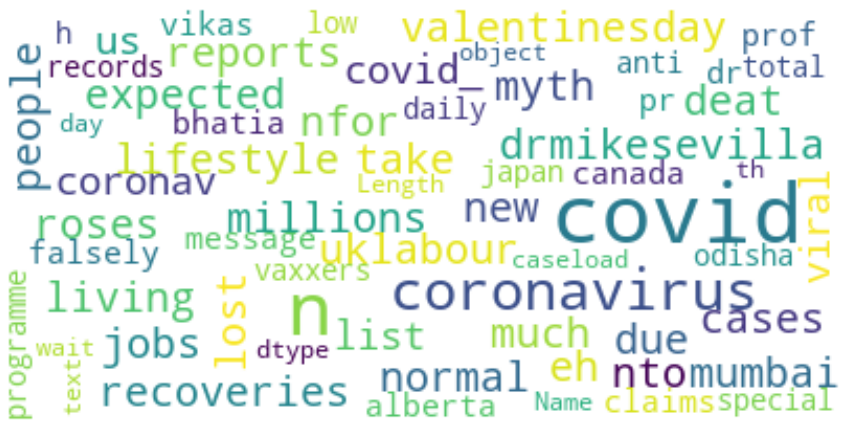

In [27]:
#wordcloud after preprocessing and removing stopwords
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df['text'])

In [28]:
df.shape

(721, 4)

In [29]:
df.isna().sum
tweet=df.copy()

In [30]:
tweet.head()

,created_at,text,screen_name,location
0,29-01-2022 18:29,drmikesevilla nfor valentinesday covid n roses...,RobertBarrows3,Khariar Odisha India
1,29-01-2022 17:33,myth living normal coronavirus lifestyle,TheHansIndiaWeb,Jaipur India
2,29-01-2022 16:36,millions people lost jobs due nto coronavirus ...,cryptofoolz_io,New Delhi India
3,29-01-2022 16:35,mumbai reports new covid cases recoveries deat...,thefirstindia,India
4,29-01-2022 16:14,much expected take eh uklabour n covid coronav...,simon_ball46,India


In [31]:
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
tweet.head()

,created_at,text,screen_name,location,sentiment,polarity
0,29-01-2022 18:29,drmikesevilla nfor valentinesday covid n roses...,RobertBarrows3,Khariar Odisha India,neutral,0.0
1,29-01-2022 17:33,myth living normal coronavirus lifestyle,TheHansIndiaWeb,Jaipur India,positive,0.15
2,29-01-2022 16:36,millions people lost jobs due nto coronavirus ...,cryptofoolz_io,New Delhi India,positive,0.005682
3,29-01-2022 16:35,mumbai reports new covid cases recoveries deat...,thefirstindia,India,positive,0.068182
4,29-01-2022 16:14,much expected take eh uklabour n covid coronav...,simon_ball46,India,negative,-0.1


In [32]:
tweet['sentiment'].value_counts()

positive    367
neutral     281
negative     73
Name: sentiment, dtype: int64

In [33]:
sentiment_df = pd.DataFrame(tweet, columns=[ "text","polarity","sentiment"])

sentiment_df.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID_INDIA pol sentnewnew25 5.csv")

In [34]:

sentiment_df.head(10)

,text,polarity,sentiment
0,drmikesevilla nfor valentinesday covid n roses...,0.0,neutral
1,myth living normal coronavirus lifestyle,0.15,positive
2,millions people lost jobs due nto coronavirus ...,0.005682,positive
3,mumbai reports new covid cases recoveries deat...,0.068182,positive
4,much expected take eh uklabour n covid coronav...,-0.1,negative
5,senatorwicker potus migrants refugees amp kids...,0.0,neutral
6,via nytimes also points irrationally side cons...,0.0,neutral
7,scotland n ncoronavirus covid daily data scotl...,0.068182,positive
8,rohittuli techindo rohittuli thanks poor middl...,-0.1,negative
9,fact antibiotics work viruses bacteria coronav...,0.0,neutral


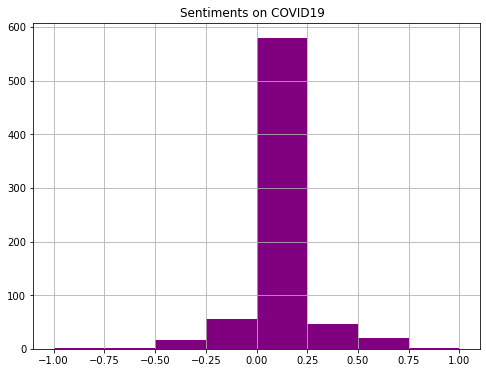

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
tweet['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments on COVID19  ")
plt.show()

In [36]:
#feature extraction(only feature)
y=tweet['sentiment'].values
y.shape

(721,)

In [37]:
x=tweet['text'].values
x.shape

(721,)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape

(576,)
(576,)
(145,)


(145,)

In [40]:
x_train.shape

(576,)

positive    367
neutral     281
negative     73
Name: sentiment, dtype: int64


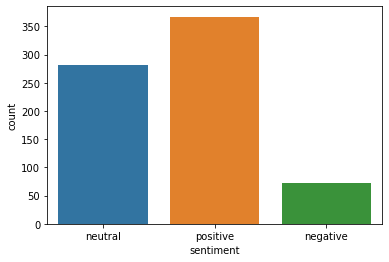

In [41]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

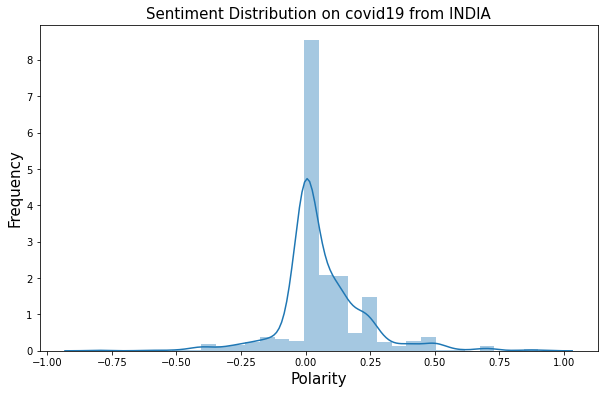

In [42]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution on covid19 from INDIA',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

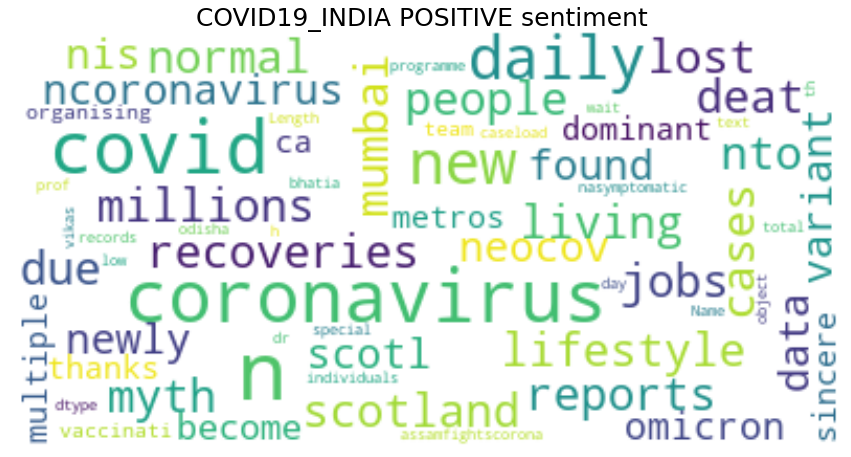

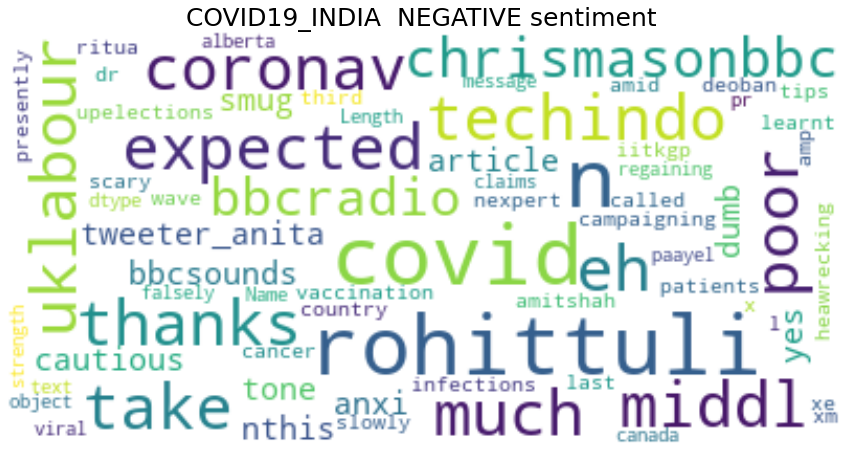

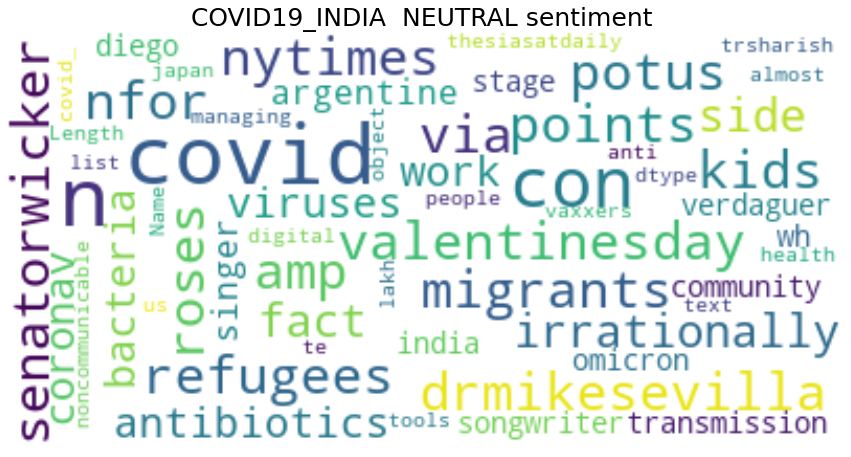

In [43]:
#wordcount with sentiment
pos = tweet['text'][tweet['sentiment'] == 'positive']
show_wordcloud(pos , 'COVID19_INDIA POSITIVE sentiment ')

neg = tweet['text'][tweet['sentiment'] == 'negative']
show_wordcloud(neg , 'COVID19_INDIA  NEGATIVE sentiment ')

neutral = tweet['text'][tweet['sentiment'] == 'neutral']
show_wordcloud(neutral , 'COVID19_INDIA  NEUTRAL sentiment ')

In [44]:
count = pd.DataFrame(tweet.groupby('sentiment').sum())
count

,created_at,text,screen_name,location,polarity
sentiment,,,,,
negative,29-01-2022 16:1429-01-2022 13:4529-01-2022 13:...,much expected take eh uklabour n covid coronav...,simon_ball46 MSiddhivinayaka wwaycorrigan ...,India Kolkata India India India India I...,-14.465271
neutral,29-01-2022 18:2929-01-2022 15:1029-01-2022 14:...,drmikesevilla nfor valentinesday covid n roses...,RobertBarrows3 WorldPeace4you drindc86 Swe...,Khariar Odisha India Jaipur India India ...,0.000000
positive,29-01-2022 17:3329-01-2022 16:3629-01-2022 16:...,myth living normal coronavirus lifestylemillio...,TheHansIndiaWeb cryptofoolz_io thefirstindi...,Jaipur India New Delhi India India Benga...,59.349259


In [45]:
words = []
words = [word for i in tweet.text for word in i.split()]

In [46]:
words

['drmikesevilla',
 'nfor',
 'valentinesday',
 'covid',
 'n',
 'roses',
 'red',
 'nviolets',
 'blue',
 'ni',
 'got',
 'vaccines',
 'nhow',
 'xe',
 'x',
 'xa',
 'myth',
 'living',
 'normal',
 'coronavirus',
 'lifestyle',
 'millions',
 'people',
 'lost',
 'jobs',
 'due',
 'nto',
 'coronavirus',
 'brand',
 'new',
 'way',
 'nmake',
 'living',
 'risen',
 'xe',
 'x',
 'xa',
 'mumbai',
 'reports',
 'new',
 'covid',
 'cases',
 'recoveries',
 'deaths',
 'last',
 'hours',
 'n',
 'nactive',
 'cases',
 'xe',
 'x',
 'xa',
 'much',
 'expected',
 'take',
 'eh',
 'uklabour',
 'n',
 'covid',
 'coronavirus',
 'xe',
 'x',
 'xa',
 'senatorwicker',
 'potus',
 'migrants',
 'refugees',
 'amp',
 'kids',
 'risk',
 'lives',
 'around',
 'xf',
 'xf',
 'xc',
 'xdto',
 'serve',
 'covid',
 'incl',
 'inventi',
 'xe',
 'x',
 'xa',
 'via',
 'nytimes',
 'also',
 'points',
 'irrationally',
 'side',
 'conservative',
 'ideologues',
 'xe',
 'x',
 'x',
 'callous',
 'disregard',
 'serio',
 'xe',
 'x',
 'xa',
 'scotland',
 'n',

In [47]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head(20)

,word,frequency
0,x,770
1,xe,689
2,n,623
3,xa,620
4,covid,570
5,cases,274
6,xf,198
7,new,178
8,deaths,83
9,positive,83


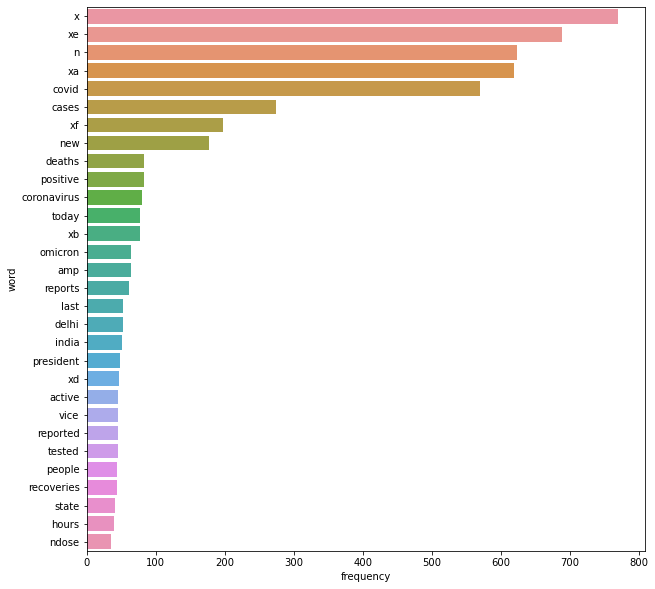

In [48]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

In [49]:
tweet.to_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA Final_sent_analysis.csv',index=False)

In [50]:
sentiment_df.head()

,text,polarity,sentiment
0,drmikesevilla nfor valentinesday covid n roses...,0.0,neutral
1,myth living normal coronavirus lifestyle,0.15,positive
2,millions people lost jobs due nto coronavirus ...,0.005682,positive
3,mumbai reports new covid cases recoveries deat...,0.068182,positive
4,much expected take eh uklabour n covid coronav...,-0.1,negative


In [51]:
sentiment_df.describe()

,text,polarity,sentiment
count,721,721.0,721
unique,661,112.0,3
top,ne delhi least new slots available amp n ncovi...,0.0,positive
freq,10,281.0,367


In [52]:
sentiment_df.groupby('sentiment').size()

sentiment
negative     73
neutral     281
positive    367
dtype: int64

In [53]:
print(sentiment_df.groupby('polarity').size())

polarity
-0.80    1
-0.60    1
-0.50    1
-0.45    1
-0.40    1
        ..
 0.55    1
 0.60    1
 0.70    5
 0.85    1
 0.90    1
Length: 112, dtype: int64


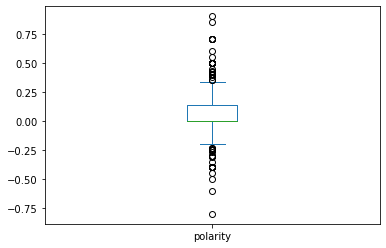

In [54]:
import matplotlib.pyplot as plt
sentiment_df.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

In [55]:
clo=['sentiment','polarity','text']
dataset2=sentiment_df.reindex(columns=clo)
#dataset2.head()
dataset2[:10]

,sentiment,polarity,text
0,neutral,0.0,drmikesevilla nfor valentinesday covid n roses...
1,positive,0.15,myth living normal coronavirus lifestyle
2,positive,0.005682,millions people lost jobs due nto coronavirus ...
3,positive,0.068182,mumbai reports new covid cases recoveries deat...
4,negative,-0.1,much expected take eh uklabour n covid coronav...
5,neutral,0.0,senatorwicker potus migrants refugees amp kids...
6,neutral,0.0,via nytimes also points irrationally side cons...
7,positive,0.068182,scotland n ncoronavirus covid daily data scotl...
8,negative,-0.1,rohittuli techindo rohittuli thanks poor middl...
9,neutral,0.0,fact antibiotics work viruses bacteria coronav...


In [56]:
dataset2.describe()#dataset2.hist()
#plt.show()

,sentiment,polarity,text
count,721,721.0,721
unique,3,112.0,661
top,positive,0.0,ne delhi least new slots available amp n ncovi...
freq,367,281.0,10


In [57]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'text'})

In [58]:
df1.head()

,text
0,researchers find evidence covid virus transmis...
1,covid lakh new covid cases india marginally lo...
2,cdcdirector nfor valentinesday covid n roses r...
3,vaccination tips cancer patients n nexpert dr ...
4,former pm abeshinzo xe x xt visit india decemb...


In [59]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [60]:
df_train.head()

,text,sentiment
0,researchers find evidence covid virus transmis...,neutral
1,covid lakh new covid cases india marginally lo...,positive
2,cdcdirector nfor valentinesday covid n roses r...,neutral
3,vaccination tips cancer patients n nexpert dr ...,negative
4,former pm abeshinzo xe x xt visit india decemb...,negative


In [61]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'text'})

In [62]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [63]:
df_test.head()

,text,sentiment
0,give much credit time alive live die covid,neutral
1,myanmar reports new covid cases death health m...,positive
2,increase regulatory focus cryptocurrency pre b...,neutral
3,many countries indopacific struggle meet vacci...,negative
4,gujarat corona update n n gujarat covid gujara...,negative


In [64]:
import string
string.punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [65]:
#storing the puntuation free text in a new column called clean_msg
df_train['text']= df_train['text'].apply(lambda x:remove_punctuation(x))
df_test['text']= df_test['text'].apply(lambda x:remove_punctuation(x))

In [66]:
df_train.head()
#punctuations are removed from news column in train dataset

,text,sentiment
0,researchers find evidence covid virus transmis...,neutral
1,covid lakh new covid cases india marginally lo...,positive
2,cdcdirector nfor valentinesday covid n roses r...,neutral
3,vaccination tips cancer patients n nexpert dr ...,negative
4,former pm abeshinzo xe x xt visit india decemb...,negative


In [67]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [69]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [70]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['covid', 'lakh', 'new', 'covid', 'cases', 'india', 'marginally', 'low', 'yesterday', 'n', 'nread']
Sentence after removing stopwords: ['xf', 'xf', 'x', 'xb', 'justin', 'himachal', 'pradesh', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'n', 'nacti', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['another', 'video', 'large', 'protest', 'vaccine', 'passports', 'central', 'stockholm', 'capital', 'sweden', 'n', 'n', 'protest', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['covid', 'cases', 'update', 'n', 'new', 'covid', 'cases', 'reported', 'today', 'gujarat', 'n', 'gujaratcoronaupdate', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['imran', 'khan', 'admits', 'pakistan', 'facing', 'massive', 'inflation', 'attempts', 'link', 'global', 'phenomenon', 'economic', 'times', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['indiafightscorona', 'rajasthan', 'nrd', 'jan', 'covid', 'pm', 'bulletin', 

Sentence after removing stopwords: ['ranaayyub', 'arvindkejriwal', 'share', 'tips', 'cure', 'covid', 'quickly']
Sentence after removing stopwords: ['update', 'newly', 'detected', 'covid', 'cases', 'last', 'hrs', 'bmc', 'area', 'nrd', 'january', 'till']
Sentence after removing stopwords: ['covid', 'hk', 'n', 'n', 'total', 'people', 'tested', 'positive', 'virus', 'parliament', 'house', 'complex', 'far', 'n', 'n', 'people', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['karnataka', 'achieves', 'covid', 'first', 'vax', 'dose', 'coverage', 'state', 'health', 'minister', 'dr', 'k', 'sudhakar', 'tweets', 'congratul', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['delhi', 'covid', 'health', 'bulletin', 'rd', 'january', 'today', 'new', 'corona', 'cases', 'registered', 'recoveries', 'amp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['leh', 'total', 'number', 'active', 'covid', 'positive', 'cases', 'crossed', 'mark', 'positive', 'cases', 'yesterday', 'total', 'xe', 'x', 'xa

Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tests', 'positive', 'covid', 'days', 'ahead', 'budget', 'session', 'parliament', 'reports', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['mobile', 'phone', 'wireless', 'technology', 'wifi', 'reached', 'xe', 'x', 'xs', 'saturation', 'point', 'crossed', 'safe', 'limits', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['delhipolice', 'requests', 'visitors', 'republicday', 'celebration', 'follow', 'covid', 'appropriate', 'behaviou', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['coronavirus', 'news', 'live', 'karnataka', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['jaipur', 'reports', 'new', 'covid', 'cases', 'today', 'n', 'n', 'rajasthan', 'covidindia', 'coronavirus', 'coronavirusupdate']
Sentence after removing stopwords: ['vice', 'president', 'venkaiahnaidu', 'tested', 'positive', 'covid', 'sunday', 'n', 'n']
Sent

Sentence after removing stopwords: ['new', 'cases', 'new', 'deaths', 'bulgaria', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['otd', 'first', 'documented', 'case', 'british', 'columbia', 'coronavirus', 'wuhan', 'bcpoli', 'cdnpoli', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['new', 'cases', 'covid', 'maharashtra', 'xe', 'x', 'xs', 'tally', 'coronavirus', 'cases', 'increased', 'n', 'nthe', 'deat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['madhyapradesh', 'covid', 'tally', 'reaches', 'new', 'cases', 'death', 'toll', 'increases', 'eight', 'mor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['vice', 'president', 'venkaiah', 'naidu', 'tested', 'positive', 'covid']
Sentence after removing stopwords: ['scotland', 'n', 'ncoronavirus', 'covid', 'daily', 'data', 'scotland', 'january', 'n', 'n', 'new', 'reported', 'death', 'people', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['karnatak

Sentence after removing stopwords: ['got', 'infected', 'covid', 'n', 'nsevere', 'sore', 'throat', 'nbode', 'ache', 'nhead', 'ache', 'nshivering', 'n', 'nbut', 'still', 'alive', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['odisha', 'reports', 'new', 'covid', 'cases', 'deaths', 'n', 'n', 'odisha', 'odishanews', 'covid', 'covidpandemic', 'healthdepartment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['xf', 'xf', 'x', 'xb', 'delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'n', 'nactive', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['covid', 'bihar', 'reported', 'new', 'cases', 'amp', 'deaths', 'nd', 'january', 'active', 'cases', 'state', 'stand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['hkanyane', 'writes', 'spread', 'new', 'omicron', 'variant', 'raises', 'pertinent', 'questions', 'long', 'term', 'prote', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['video', 'covid', 'cases', 'declining', 'last', '

Sentence after removing stopwords: ['mumbai', 'sees', 'new', 'covid', 'cases', 'fatalities', 'n', 'bmc', 'coronavirusupdates', 'n', 'covidcases', 'positivityrate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['aktulucknow', 'postpone', 'first', 'second', 'year', 'exams', 'march', 'view', 'surge', 'covid', 'cases', 'exams', 'sc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['afc', 'women', 'xe', 'x', 'xs', 'asian', 'cup', 'match', 'chinese', 'taipei', 'india', 'called', 'due', 'positive', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['amid', 'rising', 'number', 'cases', 'lot', 'us', 'back', 'wfh', 'may', 'hectic', 'many', 'us', 'ar', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['watch', 'video', 'n', 'n', 'covid', 'death', 'toll', 'climbs', 'lakh', 'lakh', 'new', 'infections', 'n', 'n', 'midday', 'middaynews', 'newsupdates', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['vice', 'president', 'mvenkaiahnaidu', 'tested', 'covid', 'positive', '

In [71]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['vaccination', 'tips', 'cancer', 'patients', 'n', 'nexpert', 'dr', 'tejinder', 'kataria', 'chairperson', 'radiation', 'oncology', 'cancer', 'center', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['former', 'pm', 'abeshinzo', 'xe', 'x', 'xt', 'visit', 'india', 'december', 'due', 'caa', 'protests', 'successor', 'suga', 'also', 'xe', 'x', 'xt', 'co', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['today', 'one', 'deadly', 'reporting', 'days', 'simcoe', 'muskoka', 'xe', 'x', 'xs', 'covid', 'pandemic', 'history', 'n']
Sentence after removing stopwords: ['amid', 'third', 'wave', 'infections', 'country', 'presently', 'lakh', 'active', 'cases', 'n', 'n', 'covid', 'omicron', 'n', 'n']
Sentence after removing stopwords: ['open', 'secret', 'half', 'telangana', 'population', 'either', 'infected', 'covid', 'viral', 'fever', 'k', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['india', 'forced', 'withdraw', 'women', 'asiancup', 'currently', 'way'

Sentence after removing stopwords: ['iitkgp', 'learnt', 'scary', 'amp', 'heawrecking', 'last', 'rituals', 'last', 'days', 'lost', 'family', 'member', 'ni', 'want', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['treason', 'trial', 'cambodian', 'opposition', 'leader', 'resumes', 'two', 'year', 'delay', 'due', 'covid', 'pandemic', 'nread', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['idiots', 'still', 'know', 'inventors', 'covid']
Sentence after removing stopwords: ['escaping', 'past', 'two', 'years', 'wave', 'caught', 'covid', 'positive', 'covid']
Sentence after removing stopwords: ['omicronvariant', 'driven', 'wave', 'covid', 'turn', 'small', 'towns', 'villages', 'coming', 'weeks', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['nepal', 'india', 'relations', 'post', 'covid', 'period', 'slowly', 'returning', 'normal', 'border', 'opened', 'amp', 'cr', 'xe', 'x', 'xa']


In [72]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['researchers', 'find', 'evidence', 'covid', 'virus', 'transmission', 'breastfeeding', 'n']
Sentence after removing stopwords: ['cdcdirector', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['cancer', 'treatment', 'may', 'inhibit', 'immune', 'response', 'covid', 'vax', 'cancer', 'inhibit', 'cancer', 'covid', 'covid', 'immune', 'inhibit']
Sentence after removing stopwords: ['covid', 'omicron', 'driven', 'wave', 'turn', 'villages', 'metros', 'says', 'expert', 'n', 'n', 'covid', 'omicronvarient']
Sentence after removing stopwords: ['days', 'covid', 'pandemic', 'covid', 'related', 'usa', 'deaths', 'date', 'current', 'trend', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['expect', 'rail', 'budget', 'rail', 'budget', 'budget', 'covid', 'delhi', 'itarsi', 'jan']
Sentence after removing stopwords: ['harpercollins', 'nfor', 'valentinesda

Sentence after removing stopwords: ['covid', 'india', 'vaccination', 'coverage', 'crosses', 'cr', 'mark', 'n', 'n', 'vaccination', 'coronavirus', 'vaccinated', 'vaccinateindia', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xc', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xc', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xc', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xf', 'x', 'xb', 'xe', 'x', 'xe', 'xef', 'xb', 'xf', 'nhome', 'isolation', 'follow', 'calls', 'made', 'rd', 'jan', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'xef', 'xb', 'xf', 'xe', 'x',

Sentence after removing stopwords: ['covid', 'state', 'govt', 'extended', 'closure', 'schools', 'colleges', 'till', 'february', 'n', 'goa']
Sentence after removing stopwords: ['saturdays', 'food', 'xf', 'xf', 'x', 'xc', 'xe', 'xd', 'xa', 'xef', 'xb', 'xf', 'xf', 'xf', 'xa', 'x', 'xe', 'x', 'xd', 'xf', 'xf', 'xd', 'xb', 'n', 'n', 'outdoorfood', 'adventure', 'kolocamp', 'france', 'foodphotography', 'outdoors', 'spain', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['florida', 'department', 'health', 'announced', 'monoclonal', 'antibody', 'treatment', 'sites', 'shut', 'fda', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['omicron', 'variant', 'covid', 'hang', 'around', 'die', 'delta', 'variant', 'way', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['tamilnadu', 'covid', 'january', 'n', 'n', 'xe', 'x', 'xa', 'tn', 'n', 'n', 'xe', 'x', 'xa', 'total', 'cases', 'n', 'n', 'xe', 'x', 'xa', 'today', 'discharged', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['tamilnadu',

Sentence after removing stopwords: ['drinks', 'nan', 'birthday', 'coronavirus']
Sentence after removing stopwords: ['spanishflu', 'apparently', 'killed', 'millions', 'much', 'info', 'affected', 'india', 'ind', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['argentine', 'singer', 'songwriter', 'diego', 'verdaguer', 'whose', 'romantic', 'hits', 'coraz', 'xc', 'xbn', 'de', 'papel', 'yo', 'te', 'amo', 'volve', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['getting', 'vaccinated', 'covid', 'continuing', 'wear', 'masks', 'extremely', 'essential', 'protect', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['omicron', 'disrupts', 'sales', 'offline', 'electronics', 'retailers', 'n', 'n', 'omicron', 'electronics', 'retailelectronics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['psychtoday', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['covid', 'state', 'g

Sentence after removing stopwords: ['jayshankar', 'contact', 'home', 'collection', 'swab', 'samples', 'mysuru', 'covid']
Sentence after removing stopwords: ['covid', 'count', 'navi', 'mumbai', 'today', 'n', 'npositive', 'cases', 'nactive', 'cases', 'ndeaths', 'nrecovered', 'n', 'ntotal', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['turkiye', 'records', 'daily', 'cases', 'covid', 'along', 'deaths', 'country', 'issued', 'vaccine', 'shot', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['modi', 'rejaain', 'xf', 'xf', 'xa', 'xa', 'n', 'neven', 'saudi', 'trolling', 'ranaayyub', 'n', 'nbtw', 'says', 'covid', 'omicron', 'last', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['must', 'congratulate', 'bcci', 'keeping', 'word', 'playing', 'series', 'rather', 'running', 'away', 'like', 'countries', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['pune', 'district', 'adds', 'covid', 'cases', 'n', 'n', 'n', 'n', 'get', 'epaper', 'daily', 'whatsapp', 'click', 'xe', 'x', 

In [73]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [74]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA unigrampositive.csv",mode='w',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA unigramnegative.csv",mode='w',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA unigramneutral.csv",mode='w',index=False,header=False)

In [75]:
df_positive.shape

(1070, 2)

In [76]:
df_negative.shape

(470, 2)

In [77]:
df_neutral.shape

(1184, 2)

In [78]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA unigram_combine.csv",mode='a',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA unigram_combine.csv",mode='a',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA unigram_combine.csv",mode='a',index=False,header=False)

In [79]:
df3=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA unigram_combine.csv",header=None,names=["unigram","repetation"])
#np.random.seed(0))
df3.head()

,unigram,repetation
0,x,288
1,xe,262
2,n,260
3,covid,252
4,xa,225


In [80]:
df3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA unigram_combine.csv",index=False)

In [81]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [82]:
df3.shape

(2724, 2)

In [83]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [84]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

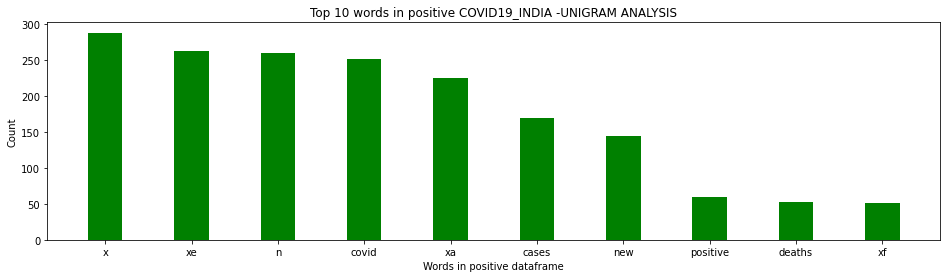

In [85]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive COVID19_INDIA -UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

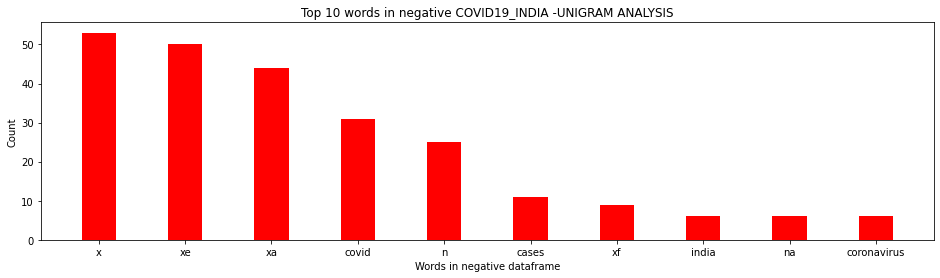

In [86]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative COVID19_INDIA -UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral COVID19_INDIA -UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [ ]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

In [ ]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

 

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [ ]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA bigrampositive.csv",mode='w',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA bigramnegative.csv",mode='w',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA bigramneutral.csv",mode='w',index=False,header=False)

In [ ]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA bigram_combine.csv",mode='a',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA bigram_combine.csv",mode='a',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA bigram_combine.csv",mode='a',index=False,header=False)

In [ ]:
df4=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA bigram_combine.csv",header=None,names=["bigram","repetation"])
#np.random.seed(df4.head(20)0))

df4.shape

In [ ]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

 

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

In [ ]:
plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)

plt.xlabel("Words in positive dataframe")

plt.ylabel("Count")

plt.title("Top 10 words in positive COVID19_INDIA -BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative COVID19_INDIA -BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral COVID19_INDIA -BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

#top 10 bigram neutral | n-grams


In [ ]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

In [ ]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [ ]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA trigram_positive.csv",mode='w',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA trigram_negative.csv",mode='w',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA trigram_neutral.csv",mode='w',index=False,header=False)

In [ ]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA trigram_combine.csv",mode='a',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA trigram_combine.csv",mode='a',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA trigram_combine.csv",mode='a',index=False,header=False)

In [ ]:
df5=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19__INDIA trigram_combine.csv",header=None,names=["trigram","repetation"])
#np.random.seed(0))
#df5.head(20)
df5.shape

In [ ]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [ ]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [ ]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive COVID19_INDIA -TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")

plt.show()

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative COVID19_INDIA -TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral COVID19_INDIA -TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()

In [ ]:
x_train.shape